#Análise de Sentimentos de processo seletivo (RH) utilizando ChatGPT em Python e Matplotlib

---

Criado por Alexandre Polselli

##**Recursos**

Artigo de apresentação da ferramenta: https://alexandrepolselli.com.br/analise-de-sentimentos-utilizada-em-processo-seletivo-rh-utilizando-chatgpt-em-python-e-matplotlib/

Github: https://github.com/cerqueiralex/chatgpt-analise-de-sentimentos

In [ ]:
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 12.8 MB/s eta 0:00:00


In [ ]:
!pip install load_dotenv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import openai

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # Ler o arquivo .env local.

openai.api_key  = ('CHAVE API OPENAI')

In [ ]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # Este é o grau de aleatoriedade da saída do modelo.
    )
    return response.choices[0].message["content"]

#Primeira Automação [V.10]


In [ ]:
import csv

In [ ]:
nome_arquivo = 'arquivo_feedbacks.csv'

# Abre o arquivo CSV e cria o objeto leitor
with open(nome_arquivo, 'r') as arquivo_csv:
    leitor = csv.reader(arquivo_csv)

    # Transforma os dados do leitor em uma lista
    reviews = list(leitor)

In [ ]:
#JSON Formatting
prompt = f"""
Identify the following items from each item in the reviews list:
- The ID for each respective review, starting with 0
- Sentiment (very positive, positive, neutral, negative or very negative)
- Is the reviewer expressing anger? (true or false)
- A list of emotions that the writer of the review is expressing

The reviews list is delimited with triple backticks.
Format your response as a JSON object with "ID, "Sentiment", "Anger" and "Emotions" as the keys.
If the information isn't present, use "unknown" as the value.
Make your response as short as possible.
Format the Anger value as a boolean.
Dont write more than 5 emotions

Reviews list: '''{reviews}'''
"""
response = get_completion(prompt)
print(response)

{
  "0": {
    "ID": "0",
    "Sentiment": "very negative",
    "Anger": true,
    "Emotions": ["hatred", "anger", "unprofessionalism"]
  },
  "1": {
    "ID": "1",
    "Sentiment": "negative",
    "Anger": false,
    "Emotions": ["doubt", "poor management"]
  },
  "2": {
    "ID": "2",
    "Sentiment": "neutral",
    "Anger": false,
    "Emotions": ["uncertainty"]
  },
  "3": {
    "ID": "3",
    "Sentiment": "unknown",
    "Anger": false,
    "Emotions": ["uncertainty"]
  },
  "4": {
    "ID": "4",
    "Sentiment": "positive",
    "Anger": false,
    "Emotions": ["professionalism"]
  },
  "5": {
    "ID": "5",
    "Sentiment": "very positive",
    "Anger": false,
    "Emotions": ["love", "amazement"]
  }
}


#Visualização


In [ ]:
import matplotlib.pyplot as plt
import json as js

In [ ]:
data_json = js.loads(response)

In [ ]:
# Inicializar o dicionário para armazenar as contagens
dicionario_contagens = {}

# Calcular a quantidade de cada tipo de valor dentro da chave 'Sentiment'
for item in data_json.values():
    sentiment = item['Sentiment']
    if sentiment in dicionario_contagens:
        dicionario_contagens[sentiment] += 1
    else:
        dicionario_contagens[sentiment] = 1

print(dicionario_contagens)

{'very negative': 1, 'negative': 1, 'neutral': 1, 'unknown': 1, 'positive': 1, 'very positive': 1}


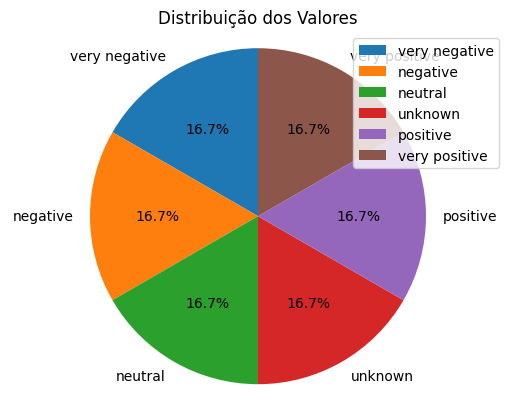

In [ ]:
# Preparar os dados para o gráfico de pizza
labels = list(dicionario_contagens.keys())
values = list(dicionario_contagens.values())

# Criar o gráfico de pizza
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)

# Ajustar aspectos visuais
ax.axis('equal')  # Torna o gráfico circular
plt.title('Distribuição dos Valores')
plt.legend()

# Exibir o gráfico
plt.show()
